In [1]:
import torch

torch.__version__

'2.0.1'

In [2]:
import os
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

import json
from PIL import Image, ImageDraw

In [6]:
def load_coco_data(image_dir, annotation_file):
    with open(annotation_file) as f:
        data = json.load(f)
    
    images = data['images']
    annotations = data['annotations']
    categories = data['categories']
    
    # 카테고리 ID와 이름을 매핑하는 딕셔너리 생성
    category_dict = {cat['id']: cat['name'] for cat in categories}
    # 이미지 ID를 key로 하고, 파일명을 value로 하는 딕셔너리 생성
    image_dict = {img['id']: img['file_name'] for img in images}
    
    # 바운딩 박스 정보를 이미지 ID별로 구성
    bbox_dict = {}
    for ann in annotations:
        image_id = ann['image_id']
        bbox = ann['bbox']  # [x_min, y_min, width, height]
        cat_name = category_dict[ann['category_id']]  # 카테고리 이름 추가
        
        if image_id in bbox_dict:
            bbox_dict[image_id].append((bbox, cat_name))
        else:
            bbox_dict[image_id] = [(bbox, cat_name)]
    
    return image_dict, bbox_dict

In [7]:
def visualize_image_bbox(image_path, bboxes):
    image = Image.open(image_path) # 이미지 로딩
    draw = ImageDraw.Draw(image)
    
    for bbox, cat_name in bboxes:
        # COCO 데이터셋의 bbox는 [x_min, y_min, width, height] 형태
        draw.rectangle([(bbox[0], bbox[1]), # 상단 좌측 좌표
                        (bbox[0] + bbox[2], bbox[1] + bbox[3])], # 하단 우측 좌표
                       outline="red")
        # 카테고리 이름을 바운딩 박스 상단에 표시
        draw.text((bbox[0], bbox[1]-10), cat_name, fill="red")
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

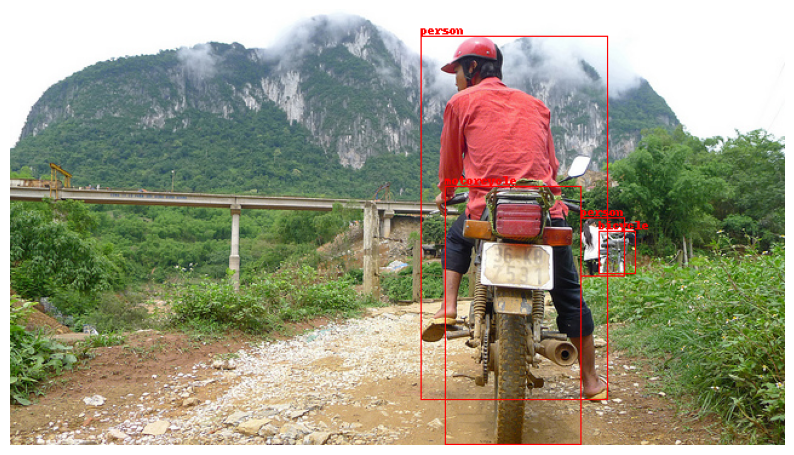

In [8]:
# 데이터셋 경로 설정
image_dir = './train2017/'
annotation_file = 'C:/Users/JOOYONKJ/Desktop/AI/side project/annotations/instances_train2017.json'

# 데이터 로딩
image_dict, bbox_dict = load_coco_data(image_dir, annotation_file)

# 첫 번째 이미지 시각화를 위한 키 가져오기
first_image_id = next(iter(image_dict))

# 시각화
visualize_image_bbox(os.path.join(image_dir, image_dict[first_image_id]), bbox_dict[first_image_id])